In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from datetime import datetime
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold
# from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
# from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
import keras
from keras import backend as K
# from keras.models import Sequential
from keras.layers import Dense, Concatenate
from keras.optimizers import Adam
# from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
# from keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
# from keras.callbacks import ReduceLROnPlateau
# from keras.regularizers import l2
# from keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Embedding, Flatten, Dot
from keras.layers import Dot
from tensorflow.keras.layers import dot
from keras.models import Model
from sklearn.model_selection import ParameterGrid

# specifically for deeplearning.
from keras.layers import Dropout, Flatten,Activation,Input,Embedding
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
from IPython.display import SVG
 
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
# import cv2                  
import numpy as np  
# from tqdm import tqdm
import os                   
# from random import shuffle  
# from zipfile import ZipFile
# from PIL import Image


# TL pecific modules
# from keras.applications.vgg16 import VGG16

In [2]:
ratingsDf = pd.read_csv('~/Desktop/Work/movielens_recommendation/ratings.csv')

In [3]:
ratingsDf['rank_latest'] = ratingsDf.groupby(['userId'])['timestamp'] \
                                .rank(method='first', ascending=False)

In [4]:
ratingsDf.userId = ratingsDf.userId.astype('category').cat.codes.values
ratingsDf.movieId = ratingsDf.movieId.astype('category').cat.codes.values

# Create Utility Matrix

In [5]:
ratingsDf.head()

,userId,movieId,rating,timestamp,rank_latest
0,0,1104,5,978300760,42.0
1,0,639,3,978302109,23.0
2,0,853,3,978301968,28.0
3,0,3177,4,978300275,47.0
4,0,2162,5,978824291,4.0


In [6]:
index = list(ratingsDf['userId'].unique())
columns = list(ratingsDf['movieId'].unique())

index = sorted(index)
column = sorted(columns)

utilityDf = pd.pivot_table(data = ratingsDf, values = 'rating', index = 'userId', columns = 'movieId')

In [7]:
utilityDf.fillna(0)

movieId,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
userId,,,,,,,,,,,,,,,,,,,,,
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# x_train,x_test,y_train,y_test=train_test_split(df[['userId','movieId']],df[['rating']],test_size=0.20,random_state=42)
users = ratingsDf.userId.unique()
movies = ratingsDf.movieId.unique()

# userid2idx = {o:i for i,o in enumerate(users)}
# movieid2idx = {o:i for i,o in enumerate(movies)}

user_id_to_idx = {user_id: idx for idx, user_id in enumerate(users)}
movie_id_to_idx = {movie_id: idx for idx, movie_id in enumerate(movies)}

In [9]:
# ratingsDf['userId'] = ratingsDf['userId'].apply(lambda x: userid2idx[x])
# ratingsDf['movieId'] = ratingsDf['movieId'].apply(lambda x: movieid2idx[x])

ratingsDf['userId'] = ratingsDf['userId'].apply(lambda x: user_id_to_idx[x])
ratingsDf['movieId'] = ratingsDf['movieId'].apply(lambda x: movie_id_to_idx[x])

split = np.random.rand(len(ratingsDf)) < 0.8
train = ratingsDf[split]
valid = ratingsDf[~split]

In [10]:
print(train.shape , valid.shape)

(799886, 5) (200323, 5)


In [10]:
train.userId

,userId,movieId,rating,timestamp,rank_latest
0,0,0,5,978300760,42.0
1,0,1,3,978302109,23.0
2,0,2,3,978301968,28.0
3,0,3,4,978300275,47.0
4,0,4,5,978824291,4.0


# Optimizer Adam

# Tuning hyperparameter, n_latent_factors

In [16]:
n_movies=len(ratingsDf['movieId'].unique())
n_users=len(ratingsDf['userId'].unique())
train.shape
batch_size = 128
epochs = 50
# Define the range of values for n_latent_factors
latent_factor_values = [8, 16, 24, 32, 40, 48]

# Create a grid of hyperparameter combinations
param_grid = {'n_latent_factors': latent_factor_values}

# Generate all possible combinations of hyperparameters
param_combinations = list(ParameterGrid(param_grid))

# Loop through each combination and train the model
results = []

for params in param_combinations:
    n_latent_factors = params['n_latent_factors']

    # Build the model with the current hyperparameters
    user_input = Input(shape=(1,), name='user_input', dtype='int64')
    user_embedding = Embedding(n_users, n_latent_factors, name='user_embedding')(user_input)
    user_vec = Flatten(name='FlattenUsers')(user_embedding)

    movie_input = Input(shape=(1,), name='movie_input', dtype='int64')
    movie_embedding = Embedding(n_movies, n_latent_factors, name='movie_embedding')(movie_input)
    movie_vec = Flatten(name='FlattenMovies')(movie_embedding)

    sim = dot([user_vec, movie_vec], name='Simalarity-Dot-Product', axes=1)
    model = keras.models.Model([user_input, movie_input], sim)

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    History = model.fit([train.userId, train.movieId], train.rating, batch_size=batch_size,
                        epochs=epochs, validation_data=([valid.userId, valid.movieId], valid.rating),
                        verbose=0)

    # Store the results
    results.append({'n_latent_factors': n_latent_factors,
                    'train_loss': History.history['loss'][-1],
                    'val_loss': History.history['val_loss'][-1]})

# Print the results
for result in results:
    print(f"n_latent_factors: {result['n_latent_factors']}, Train Loss: {result['train_loss']}, Val Loss: {result['val_loss']}")

n_latent_factors: 8, Train Loss: 0.6321126222610474, Val Loss: 0.7770906090736389
n_latent_factors: 16, Train Loss: 0.5390723347663879, Val Loss: 0.864422082901001
n_latent_factors: 24, Train Loss: 0.46388325095176697, Val Loss: 0.9735090136528015
n_latent_factors: 32, Train Loss: 0.40311890840530396, Val Loss: 1.088097333908081
n_latent_factors: 40, Train Loss: 0.3518680930137634, Val Loss: 1.2015838623046875
n_latent_factors: 48, Train Loss: 0.30731019377708435, Val Loss: 1.2965773344039917


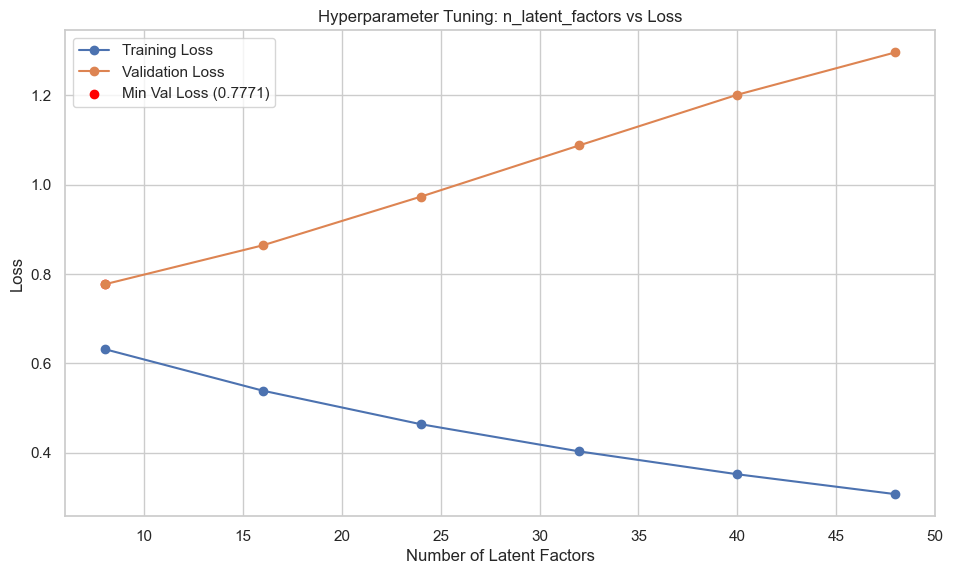

In [17]:
n_latent_factors_list = [result['n_latent_factors'] for result in results]
train_loss_list = [result['train_loss'] for result in results]
val_loss_list = [result['val_loss'] for result in results]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(n_latent_factors_list, train_loss_list, marker='o', label='Training Loss')
plt.plot(n_latent_factors_list, val_loss_list, marker='o', label='Validation Loss')

# Highlight the point with the minimum validation loss
min_val_loss_index = val_loss_list.index(min(val_loss_list))
min_val_loss_n_latent_factors = n_latent_factors_list[min_val_loss_index]
min_val_loss = min(val_loss_list)
plt.scatter(min_val_loss_n_latent_factors, min_val_loss, color='red', label=f'Min Val Loss ({min_val_loss:.4f})')

# Add labels and title
plt.xlabel('Number of Latent Factors')
plt.ylabel('Loss')
plt.title('Hyperparameter Tuning: n_latent_factors vs Loss')
plt.legend()
plt.grid(True)
plt.show()

## Matrix Factorization

In [18]:
n_movies=len(ratingsDf['movieId'].unique())
n_users=len(ratingsDf['userId'].unique())


# tuning hyperparameters

n_latent_factors = 8

In [19]:
user_input = Input(shape=(1,),name='user_input',dtype='int64')

In [20]:
user_embedding = Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)

In [21]:
user_vec = Flatten(name='FlattenUsers')(user_embedding)

In [22]:
movie_input = Input(shape=(1,),name='movie_input',dtype='int64')
movie_embedding = Embedding(n_movies,n_latent_factors,name='movie_embedding')(movie_input)
movie_vec = Flatten(name='FlattenMovies')(movie_embedding)

In [23]:
sim = dot([user_vec,movie_vec],name='Simalarity-Dot-Product',axes=1)
model = keras.models.Model([user_input, movie_input],sim)

## Run model

In [ ]:
tf.keras.optimizers.legacy.Adam(learning_rate=1e-4)

In [24]:
train.shape
batch_size = 128
epochs = 50

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')
History = model.fit([train.userId,train.movieId],train.rating, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.userId,valid.movieId],valid.rating),
                              verbose = 1)

Epoch 1/50
6247/6247 [==============================] - 3s 424us/step - loss: 5.5571 - val_loss: 1.2229
Epoch 2/50
6247/6247 [==============================] - 3s 421us/step - loss: 0.9767 - val_loss: 0.8896
Epoch 3/50
6247/6247 [==============================] - 3s 420us/step - loss: 0.8618 - val_loss: 0.8595
Epoch 4/50
6247/6247 [==============================] - 3s 450us/step - loss: 0.8444 - val_loss: 0.8474
Epoch 5/50
6247/6247 [==============================] - 3s 437us/step - loss: 0.8314 - val_loss: 0.8350
Epoch 6/50
6247/6247 [==============================] - 3s 415us/step - loss: 0.8169 - val_loss: 0.8225
Epoch 7/50
6247/6247 [==============================] - 3s 413us/step - loss: 0.8022 - val_loss: 0.8107
Epoch 8/50
6247/6247 [==============================] - 3s 415us/step - loss: 0.7884 - val_loss: 0.8029
Epoch 9/50
6247/6247 [==============================] - 3s 415us/step - loss: 0.7758 - val_loss: 0.7932
Epoch 10/50
6247/6247 [==============================] - 3s 416u

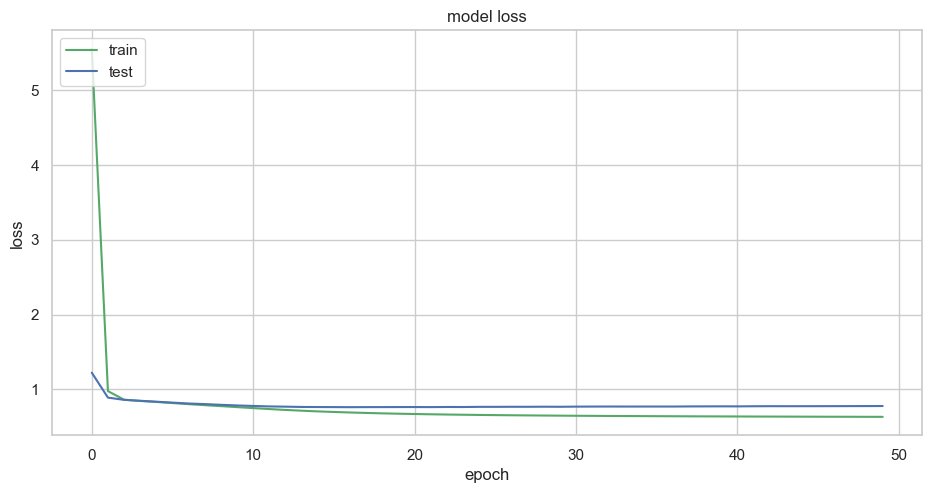

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(History.history['loss'] , 'g')
plt.plot(History.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

# Embedding

In [27]:
n_latent_factors = 8
n_movies=len(ratingsDf['movieId'].unique())
n_users=len(ratingsDf['userId'].unique())

In [28]:
user_input=Input(shape=(1,),name='user_input',dtype='int64')
user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
user_vec=Flatten(name='FlattenUsers')(user_embedding)
user_vec=Dropout(0.40)(user_vec)

In [29]:
movie_input = Input(shape=(1,),name='movie_input',dtype='int64')
movie_embedding = Embedding(n_movies,n_latent_factors,name='movie_embedding')(movie_input)
movie_vec=Flatten(name='FlattenMovies')(movie_embedding)
movie_vec=Dropout(0.40)(movie_vec)

In [30]:
sim = dot([user_vec,movie_vec],name='Simalarity-Dot-Product',axes=1)

In [31]:
nn_inp = Dense(96,activation='relu')(sim)
nn_inp = Dropout(0.4)(nn_inp)
# nn_inp=BatchNormalization()(nn_inp)
nn_inp=Dense(1,activation='relu')(nn_inp)
nn_model =keras.models.Model([user_input, movie_input],nn_inp)
nn_model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 movie_input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 user_embedding (Embedding)  (None, 1, 8)                 48320     ['user_input[0][0]']          
                                                                                                  
 movie_embedding (Embedding  (None, 1, 8)                 29648     ['movie_input[0][0]']         
 )                                                                                         

In [32]:
nn_model.compile(optimizer=Adam(lr=1e-3),loss='mse')

In [33]:
batch_size=128
epochs=20

In [34]:
History = nn_model.fit([train.userId,train.movieId],train.rating, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.userId,valid.movieId],valid.rating),
                              verbose = 1)

Epoch 1/20
6247/6247 [==============================] - 4s 541us/step - loss: 1.5331 - val_loss: 1.2501
Epoch 2/20
6247/6247 [==============================] - 3s 545us/step - loss: 1.1807 - val_loss: 1.1102
Epoch 3/20
6247/6247 [==============================] - 3s 536us/step - loss: 1.0917 - val_loss: 1.0900
Epoch 4/20
6247/6247 [==============================] - 3s 532us/step - loss: 1.0720 - val_loss: 1.0856
Epoch 5/20
6247/6247 [==============================] - 3s 530us/step - loss: 1.0631 - val_loss: 1.0832
Epoch 6/20
6247/6247 [==============================] - 3s 530us/step - loss: 1.0593 - val_loss: 1.0689
Epoch 7/20
6247/6247 [==============================] - 3s 535us/step - loss: 1.0541 - val_loss: 1.0659
Epoch 8/20
6247/6247 [==============================] - 3s 547us/step - loss: 1.0524 - val_loss: 1.0662
Epoch 9/20
6247/6247 [==============================] - 3s 531us/step - loss: 1.0484 - val_loss: 1.0761
Epoch 10/20
6247/6247 [==============================] - 3s 532u

# Stochastic Gradient Descent

In [ ]:
n_movies=len(ratingsDf['movieId'].unique())
n_users=len(ratingsDf['userId'].unique())
train.shape
batch_size = 128
epochs = 50
# Define the range of values for n_latent_factors
latent_factor_values = [8, 16, 24, 32, 40, 48]

# Create a grid of hyperparameter combinations
param_grid = {'n_latent_factors': latent_factor_values}

# Generate all possible combinations of hyperparameters
param_combinations = list(ParameterGrid(param_grid))

# Loop through each combination and train the model
results = []

for params in param_combinations:
    n_latent_factors = params['n_latent_factors']

    # Build the model with the current hyperparameters
    user_input = Input(shape=(1,), name='user_input', dtype='int64')
    user_embedding = Embedding(n_users, n_latent_factors, name='user_embedding')(user_input)
    user_vec = Flatten(name='FlattenUsers')(user_embedding)

    movie_input = Input(shape=(1,), name='movie_input', dtype='int64')
    movie_embedding = Embedding(n_movies, n_latent_factors, name='movie_embedding')(movie_input)
    movie_vec = Flatten(name='FlattenMovies')(movie_embedding)

    sim = dot([user_vec, movie_vec], name='Simalarity-Dot-Product', axes=1)
    model = keras.models.Model([user_input, movie_input], sim)

    # Use Stochastic Gradient Descent optimizer
    sgd = SGD(lr=0.01, momentum=0.9)  # You can adjust the learning rate and momentum as needed
    model.compile(optimizer=sgd, loss='mean_squared_error')

    # Train the model
    History = model.fit([train.userId, train.movieId], train.rating, batch_size=batch_size,
                        epochs=epochs, validation_data=([valid.userId, valid.movieId], valid.rating),
                        verbose=0)

    # Store the results
    results.append({'n_latent_factors': n_latent_factors,
                    'train_loss': History.history['loss'][-1],
                    'val_loss': History.history['val_loss'][-1]})

# Print the results
for result in results:
    print(f"n_latent_factors: {result['n_latent_factors']}, Train Loss: {result['train_loss']}, Val Loss: {result['val_loss']}")
